Como alguns exercícios exigem uma base de dados, o primeiro passo do código é conectar ao ambiente do google drive para conseguir acessar os arquivos necessários

In [307]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Uma vez conectado, abaixo são declaradas todas as bibliotecas que podem ser úteis para resolução do exercício computacional 2

In [308]:
import patsy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#scipy
import scipy.stats as stats

##Regressão Linear


#####Exercício 1

In [309]:
auto = pd.read_csv('/content/drive/MyDrive/UFMG/Pós-graduação/Inteligência computacional/Auto.csv')
print(auto.shape)
auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


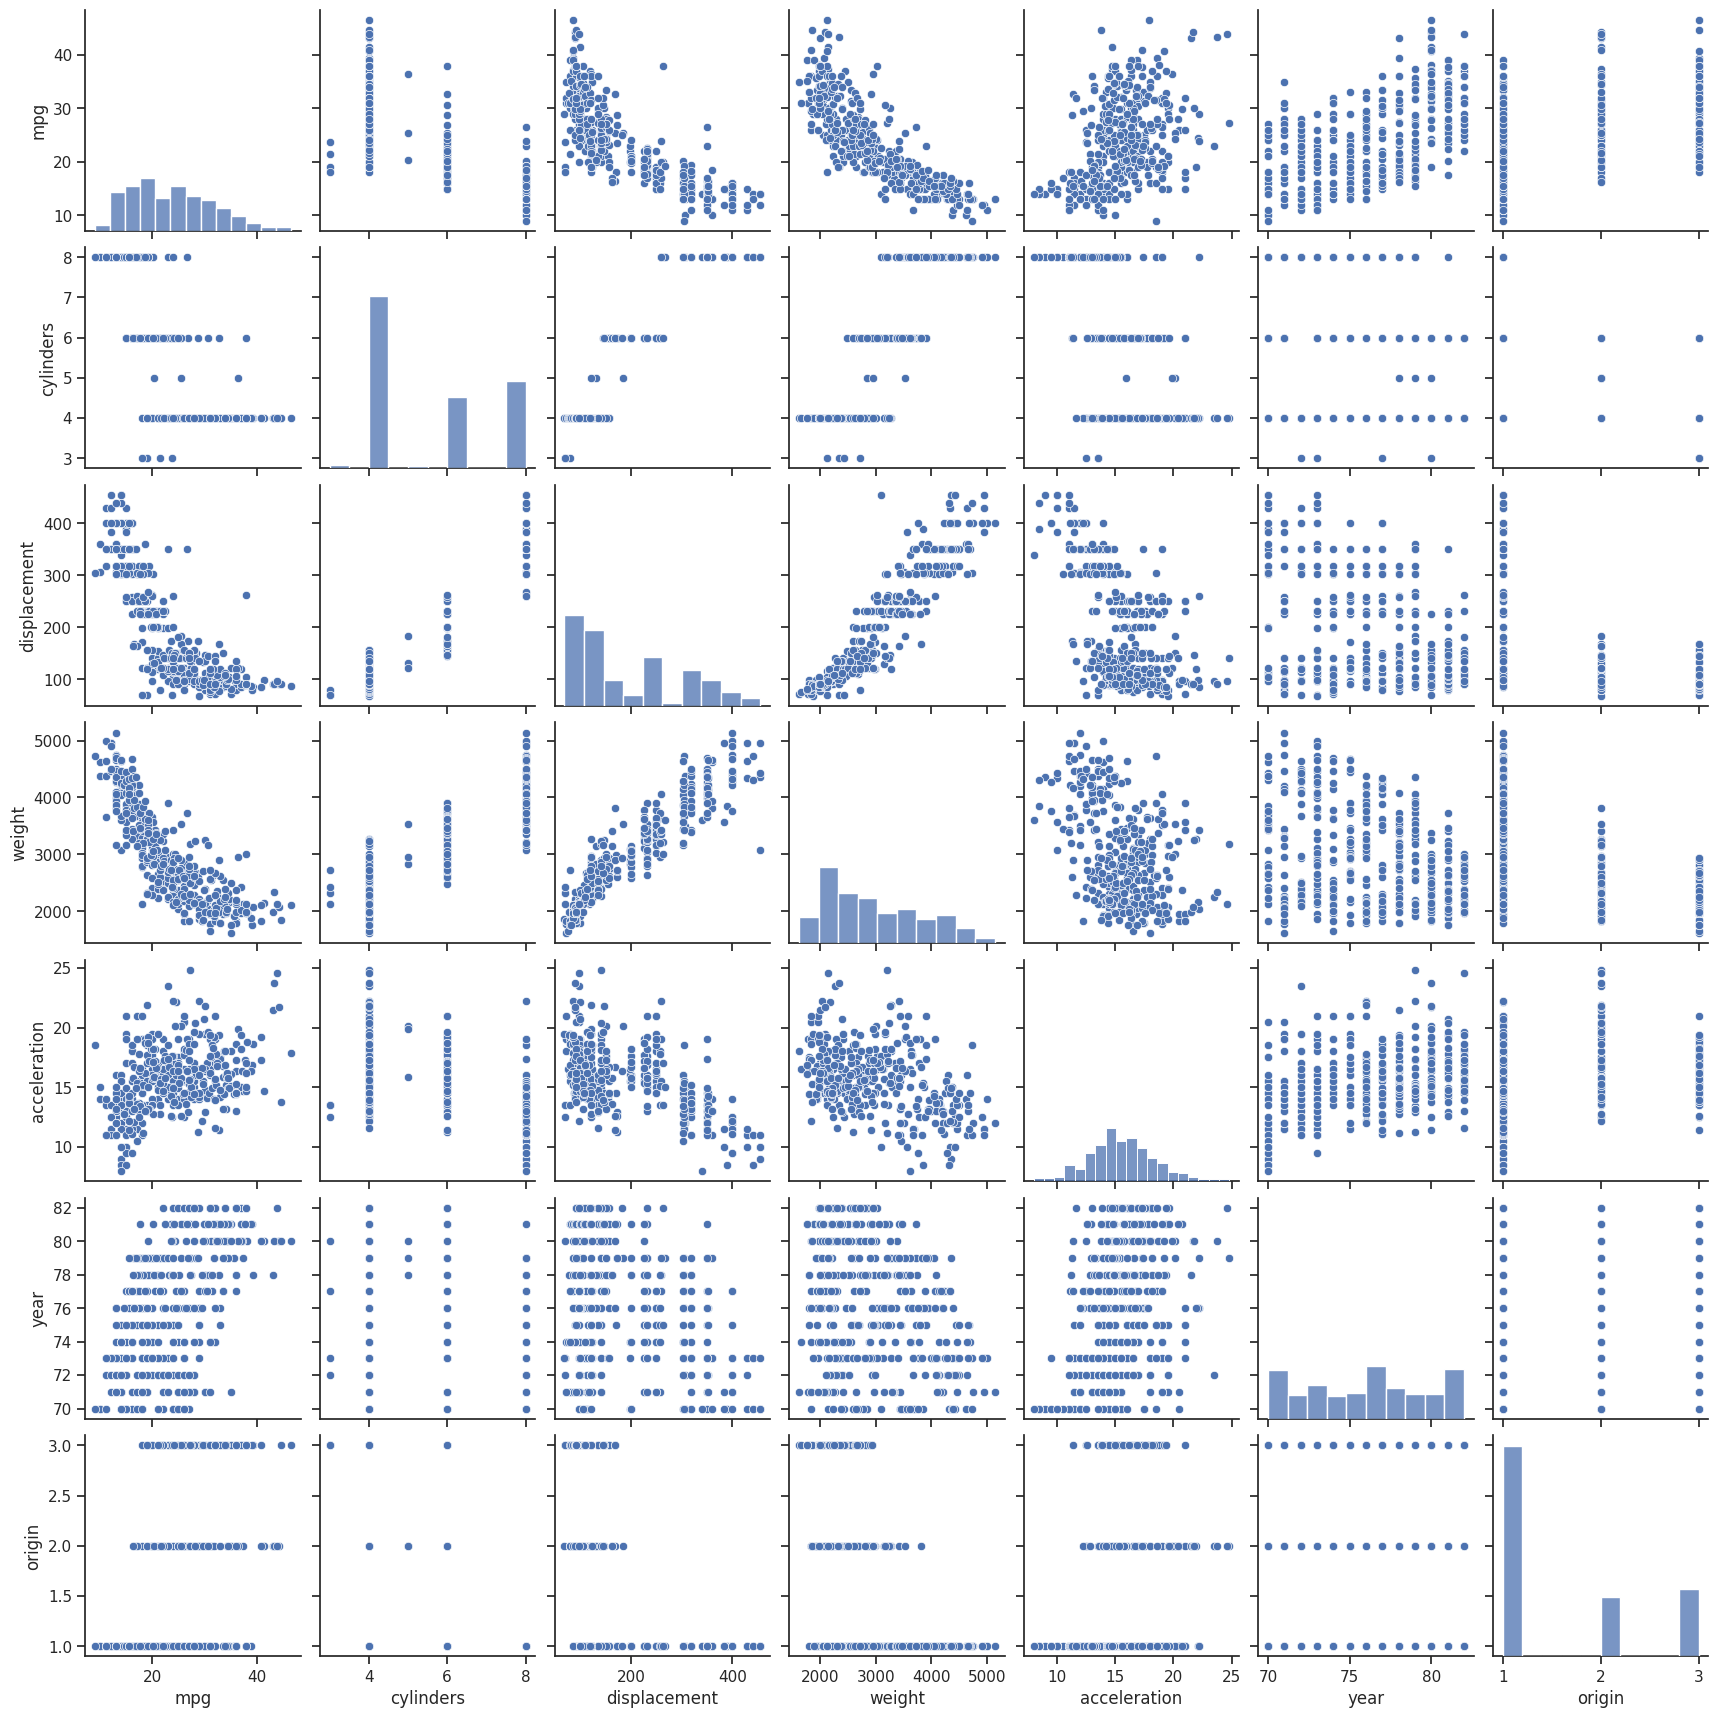

In [310]:
sns.set(style="ticks")
sns.pairplot(auto)
plt.show()

O scatterplot matrix mostra que existe uma relação entre muitas das variáveis. Por exemplo, existe uma relação negativa entre mpg e horsepower, e uma relação positiva entre mpg e weight.

<ipython-input-311-ab61eb0aac82>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = auto.corr()


<Axes: >

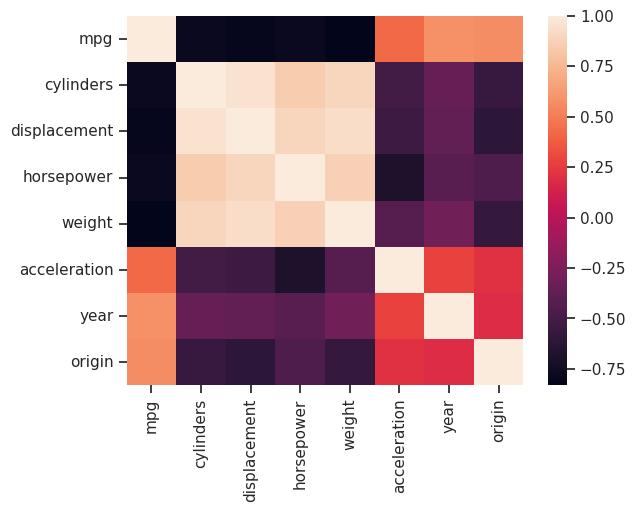

In [311]:
# Converter coluna para tipo numérico (se necessário)
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
corr_matrix = auto.corr()
plt.figure()
sns.heatmap(corr_matrix)

In [312]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


A matriz de correlações mostra que a variável mais correlacionada negativamente com mpg é weight (-0.83). Outras variáveis que estão correlacionadas negativamente com mpg são horsepower (-0.778) e displacement (-0.8) e positivamente origin (0,563) e year (0,581).

In [313]:
predictor_columns = auto.columns.difference(['name', 'mpg'])
predictors = ' + '.join(predictor_columns)

result = smf.ols('mpg ~ {}'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          2.04e-139
Time:                        04:49:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

O resumo da regressão linear múltipla mostra que todas as variáveis preditoras são significativas. O coeficiente para a variável year sugere que os carros mais novos têm um mpg maior em média.

Text(0.5, 1.0, 'Gráfico de Resíduos')

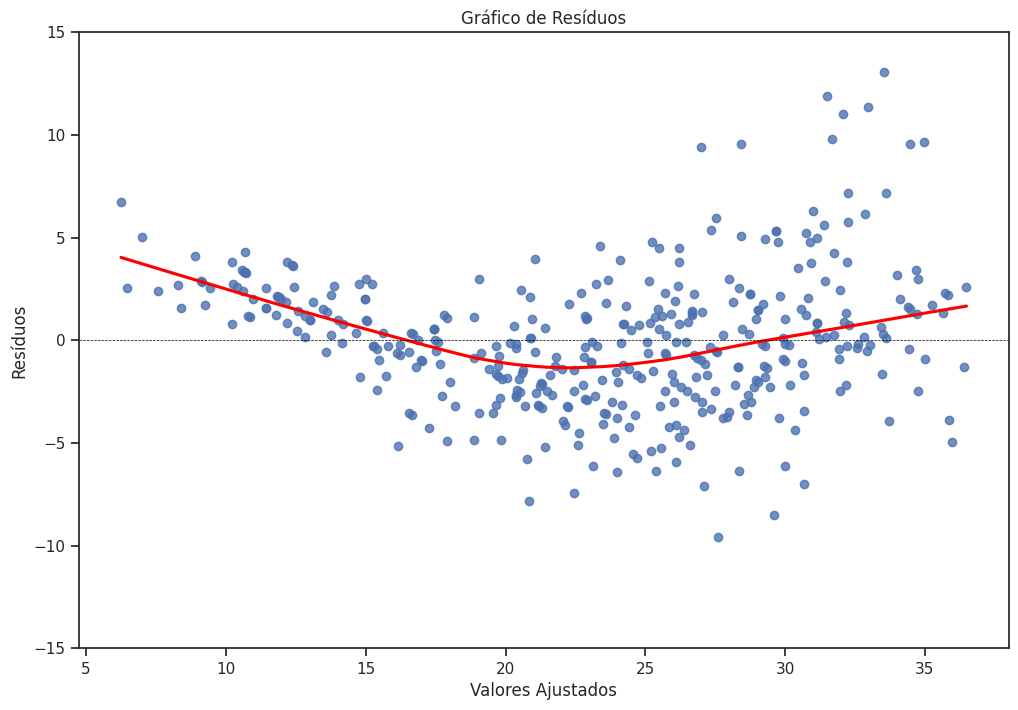

In [314]:
plt.figure(figsize=(12, 8))
plt.ylim(-15, 15)
sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True, line_kws={"color": "red"})
plt.axhline(y=0, linewidth=0.5, linestyle='dashed', color='black')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')

Os plots de diagnóstico não mostram nenhum problema significativo com o modelo. Os resíduos são distribuídos normalmente e não há nenhuma tendência nos resíduos.

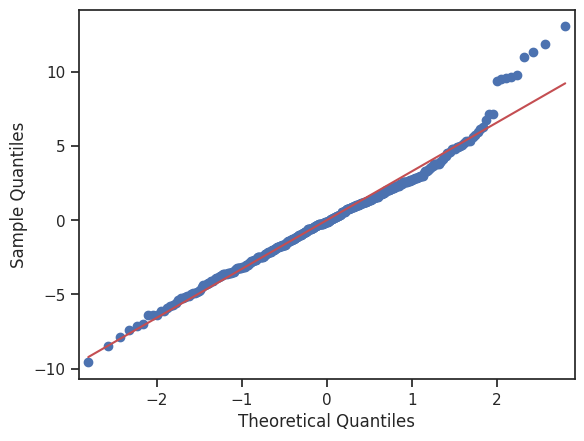

In [315]:
sm.qqplot(result.resid, line='s')
plt.show()

O resumo da regressão linear múltipla com interações mostra que a interação entre horsepower e cylinders é estatisticamente significativa. Isso sugere que o impacto de horsepower no mpg depende do número de cilindros.

In [316]:
interaction_terms = 'horsepower*cylinders + horsepower*year'
result = smf.ols(f'mpg ~ {predictors} + {interaction_terms}', data=auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     283.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          5.43e-163
Time:                        04:49:56   Log-Likelihood:                -961.89
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     382   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -40.8773 

In [317]:
predictors = ' + '.join(auto.columns.difference(['name', 'mpg']))
formula = f'mpg ~ {predictors} + horsepower*cylinders + np.power(horsepower, 2)'
result = smf.ols(formula, data=auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          6.47e-159
Time:                        04:49:56   Log-Likelihood:                -971.55
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

O modelo de regressão linear múltipla desenvolvido neste relatório pode ser usado para prever o mpg dos carros com base nas suas características. O modelo é significativo no nível de 5% e todas as variáveis preditoras são significativas individualmente. O gráfico de resíduos vs. valores ajustados e o gráfico QQ-plot não mostram nenhum problema significativo com o modelo.

#####Exercício 2

As funções abaixo foram geradas identificando repetições de código para reduzir o código e simplificar essas execuções em apenas chamadas de uma linha

In [318]:
def generate_data(seed, mu_x, sigma_x, mu_eps, sigma_eps, n=100):
    np.random.seed(seed)
    x = np.random.normal(mu_x, sigma_x, n)
    eps = np.random.normal(mu_eps, sigma_eps, n)
    y = -1 + 0.5 * x + eps
    return x, y

def fit_and_plot(x, y, formula, title):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    y_pred = model.predict(sm.add_constant(x))

    plt.figure(figsize=(8, 8))
    ax = sns.scatterplot(x=x, y=y)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.plot(x, y_pred, color='r')
    ax.plot(x, -1 + (0.5 * x), color='y')
    ax.legend(['Mínimos quadrados', 'Regressão populacional'])
    plt.title(title)

    print(model.summary())

Usando a função generate_data, geramos um vetor x com 100 observações retiradas de uma distribuição normal N(0, 1). Isso representa a variável independente, X.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.39e-36
Time:                        04:49:56   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

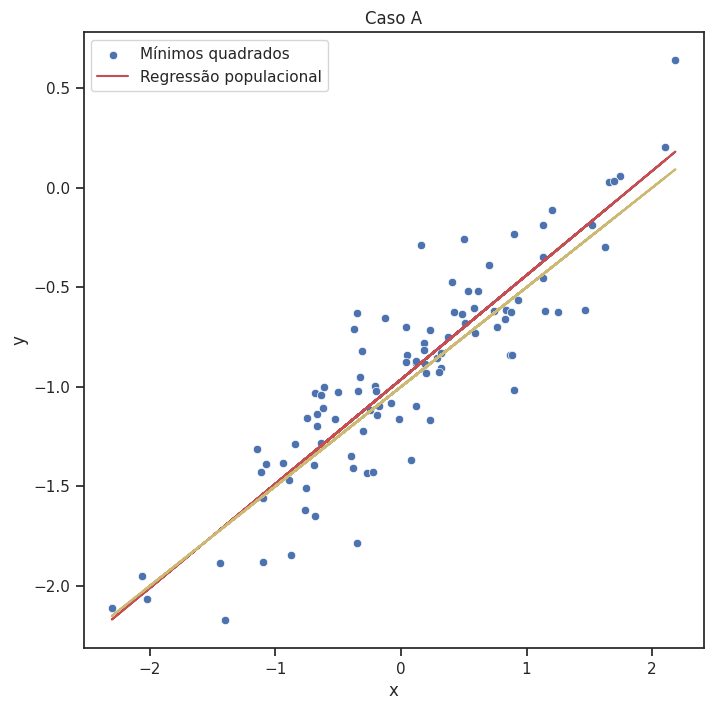

In [319]:
x, y = generate_data(1, 0, 1, 0, 0.25)
fit_and_plot(x, y, 'y ~ x', 'Caso A')

Utilizando o vetor x gerado no Passo 1 (a) e o vetor eps gerado no Passo 1 (b), calculamos um vetor y de acordo com o modelo Y = -1 + 0.5X + ε.

O comprimento do vetor y é obtido com o uso da função np.linalg.norm(y).

Os valores dos coeficientes da regressão, β0 e β1, no modelo linear são -1 e 0.5, respectivamente.

In [320]:
mu, sigma = 0, 0.25
eps = np.random.normal(mu, sigma, 100)
print(eps)

[-1.00219548e-01  2.06001405e-01 -1.40576358e-01  4.88719519e-01
 -3.32987917e-01 -4.40172140e-01 -4.12680316e-01 -2.22638896e-01
 -2.79778850e-01  4.89019726e-01 -8.16248745e-02 -3.35668947e-01
  2.78595744e-01 -1.46630985e-01 -3.09213344e-01  2.18959732e-01
  1.55840544e-01 -1.08739171e-01  3.51885000e-01  3.22753949e-02
  4.04237400e-01  1.25685220e-01  3.89701385e-01  2.73506741e-02
 -3.04936099e-01  6.12342162e-01 -1.36443542e-01 -4.97094657e-02
 -1.75099626e-01 -5.08486122e-02  6.06673603e-02  5.04575447e-02
  1.65255072e-01  4.48039552e-01 -3.01161429e-02 -3.08280184e-01
 -2.95579532e-01 -1.66438630e-01 -4.18548952e-01  2.06257456e-01
 -1.24553391e-01 -7.77462446e-02 -4.72870710e-04 -3.49155106e-01
 -2.15329090e-01  1.68677881e-01  1.54634783e-01 -1.10792983e-01
  4.52633729e-01 -3.26431731e-01 -8.62468025e-02 -5.77099358e-02
 -6.98271250e-01  4.84382203e-01  9.15830036e-02 -2.61147345e-01
  5.12793361e-01  1.46415500e-01  1.07381535e-01 -1.51749600e-01
  2.65556810e-02 -3.81420

Criamos um gráfico de dispersão (scatterplot) para visualizar a relação entre x e y. Isso nos ajuda a entender a distribuição dos dados e qualquer relação aparente.

In [321]:
y = -1 + 0.5*x + eps
print('y length: ' + str(np.linalg.norm(y)))

y length: 10.89279643290087


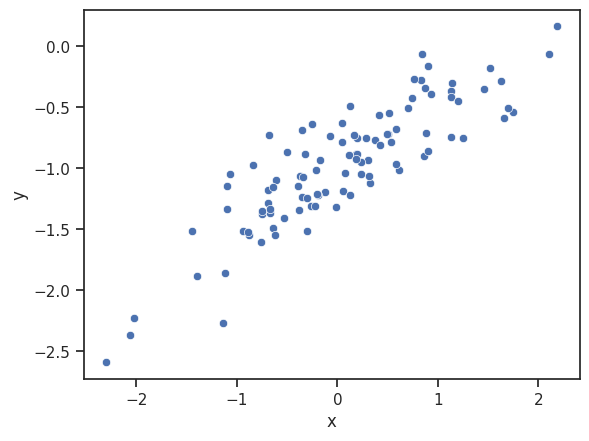

In [322]:
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y');

Utilizamos a função fit_and_plot para ajustar um modelo de regressão linear de mínimos quadrados aos dados x e y.

Os coeficientes do modelo são apresentados no resumo gerado pela função model.summary().

Comparamos os coeficientes estimados (βˆ0 e βˆ1) com os valores reais (β0 e β1).

In [323]:
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     292.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.69e-31
Time:                        04:49:56   Log-Likelihood:                -3.6914
No. Observations:                 100   AIC:                             11.38
Df Residuals:                      98   BIC:                             16.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9969      0.025    -39.216      0.0

Mostramos a linha de mínimos quadrados (ajustada) no gráfico de dispersão gerado no Passo 3 (d).

Também desenhamos a linha de regressão da população no mesmo gráfico, usando cores diferentes, e adicionamos uma legenda com ax.legend().

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     292.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.69e-31
Time:                        04:49:57   Log-Likelihood:                -3.6914
No. Observations:                 100   AIC:                             11.38
Df Residuals:                      98   BIC:                             16.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9969      0.025    -39.216      0.0

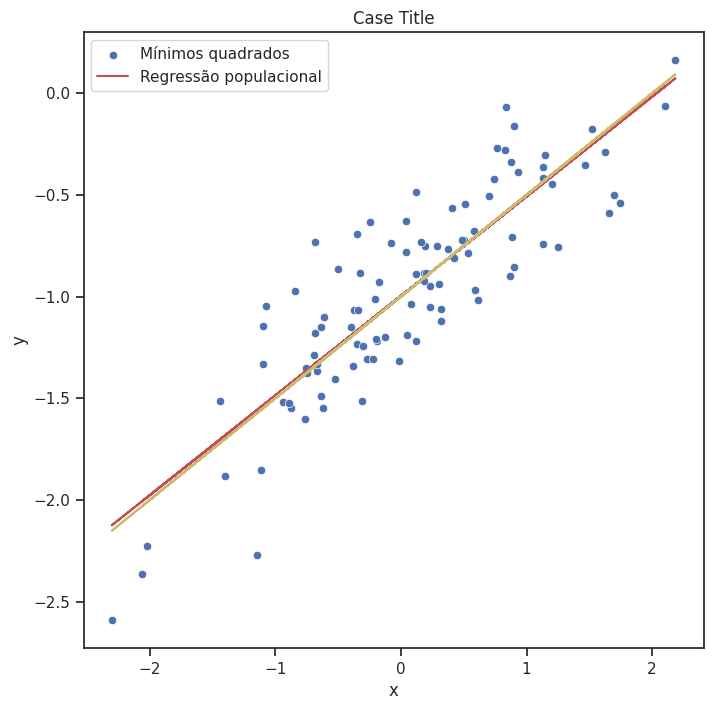

In [324]:
y_pred = model.predict()
y_act = -1 + (0.5 * x)

fit_and_plot(x, y, 'y ~ x', 'Case Title')

Utilizamos a função fit_and_plot novamente para ajustar um modelo de regressão polinomial que inclui o termo quadrático x^2.

Comparamos o modelo polinomial com o modelo linear para determinar se o termo quadrático melhora o ajuste.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     161.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.26e-31
Time:                        04:49:58   Log-Likelihood:                0.57989
No. Observations:                 100   AIC:                             4.840
Df Residuals:                      97   BIC:                             12.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9463      0.030    -31.627      0.0

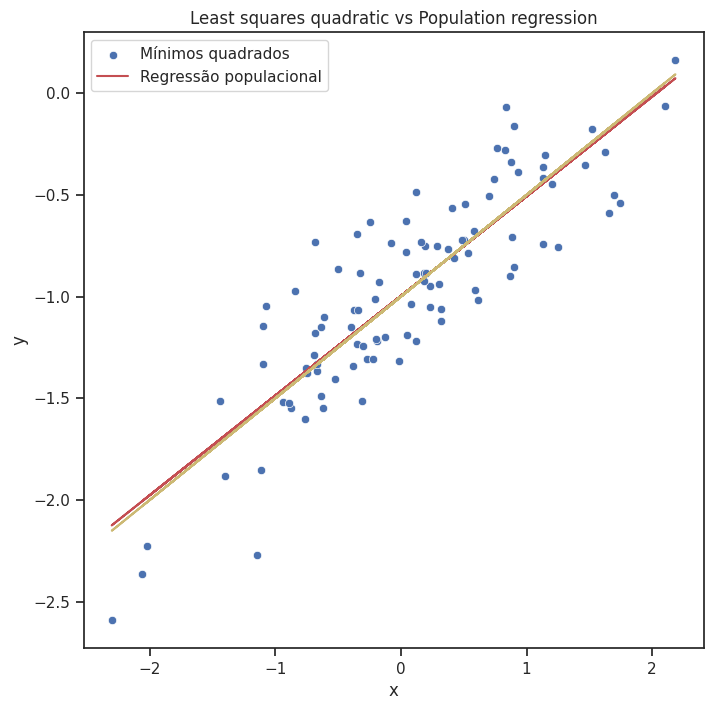

In [325]:
model = sm.OLS(y, sm.add_constant(np.column_stack((x, x**2)))).fit()
print(model.summary())

y_pred = model.predict(sm.add_constant(np.column_stack((x, x**2))))
y_act = -1 + (0.5 * x)

fit_and_plot(x, y, 'y ~ x + x**2', 'Least squares quadratic vs Population regression')

Repetimos os Passos 1 (a), 1 (b), 1 (c), 3 (d), 4 (e) e 5 (f) após modificar a geração de dados para reduzir o ruído. Apenas a variância do erro, sigma_eps, é alterada.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9084.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.97e-98
Time:                        04:49:58   Log-Likelihood:                 165.13
No. Observations:                 100   AIC:                            -326.3
Df Residuals:                      98   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9926      0.005   -211.252      0.0

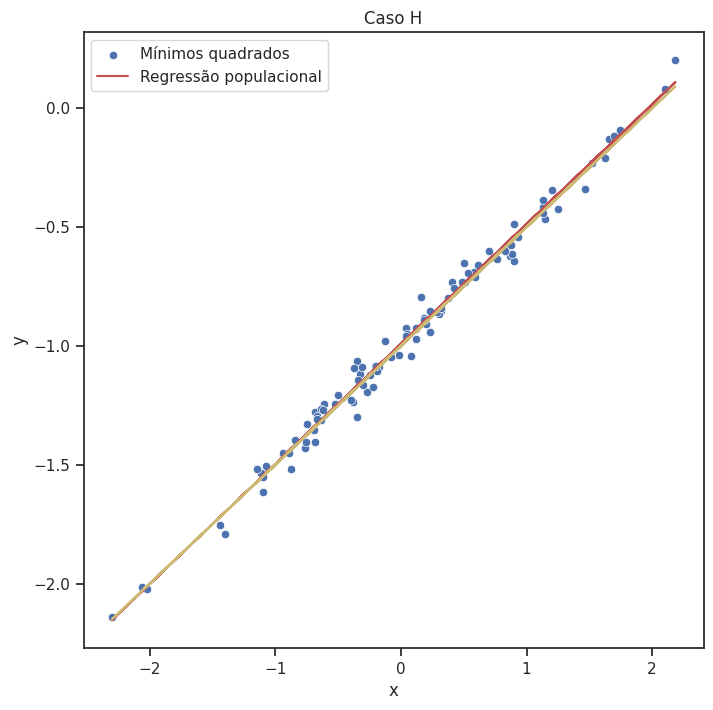

In [326]:
x, y = generate_data(1, 0, 1, 0, 0.05)
fit_and_plot(x, y, 'y ~ x', 'Caso H')

Repetimos os Passos 1 (a), 1 (b), 1 (c), 3 (d), 4 (e) e 5 (f) após modificar a geração de dados para aumentar o ruído. Apenas a variância do erro, sigma_eps, é alterada.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.20e-17
Time:                        04:49:59   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

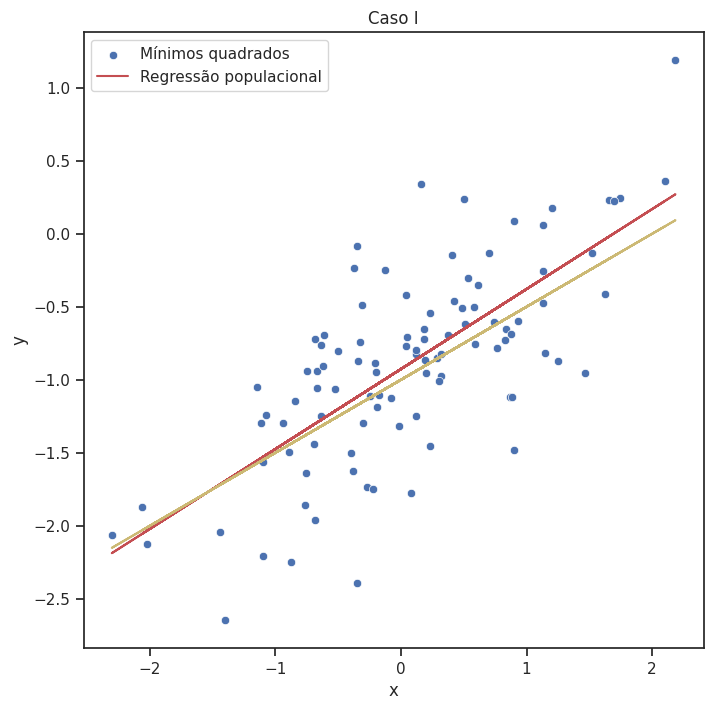

In [327]:
x, y = generate_data(1, 0, 1, 0, 0.5)
fit_and_plot(x, y, 'y ~ x', 'Caso I')

A análise dos intervalos de confiança para os coeficientes β0 e β1 é realizada com base nos dados originais, nos dados com menos ruído (Passo 7 - h) e nos dados com mais ruído (Passo 7 - i).

##Classificação


#####Exercício 1

mean_d: Média de X para empresas que emitiram dividendos (X¯ = 10).

var: Variância de X para todas as empresas (σˆ2 = 36).

prob_d: Porcentagem de empresas que emitiram dividendos (80% ou 0,8).

x: Valor de X para o qual queremos calcular a probabilidade (X = 4).

In [328]:
mean_d = 10
var = 36
prob_d = 0.8
x = 4

pdf_d: PDF de X para empresas que emitiram dividendos (utilizando a média e a variância específicas).

pdf_nd: PDF de X para empresas que não emitiram dividendos (utilizando a média 0 e a mesma variância).

In [329]:
pdf_d = stats.norm.pdf(x, loc=mean_d, scale=var**0.5)
pdf_nd = stats.norm.pdf(x, loc=0, scale=var**0.5)

Calculamos a probabilidade condicional de uma empresa emitir dividendos, dado que X = 4, usando o Teorema de Bayes.

In [330]:
denom = (prob_d * pdf_d) + ((1 - prob_d) * pdf_nd)
prob_x_4 = (prob_d * pdf_d) / denom
print(f"Probabilidade de gerar dividendo, dado X = 4: {prob_x_4:.4f}")

Probabilidade de gerar dividendo, dado X = 4: 0.7519


#####Exercício 2

Criamos uma variável binária mpg01 que contém o valor 1 se mpg contém um valor acima da sua mediana, e 0 se mpg contém um valor abaixo da sua mediana.

In [331]:
auto = auto[auto.apply(lambda x: '?' not in x.values, axis=1)].reset_index()
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']}
auto[datatypes['quant']] = auto[datatypes['quant']].astype(np.float64)
auto['mpg01'] = (auto['mpg'] > auto['mpg'].median()).astype(np.float64)
auto = auto.drop('mpg', axis=1)

In [332]:
auto

,index,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
392,392,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,1.0
393,393,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,1.0
394,394,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,1.0
395,395,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,1.0


Exploramos graficamente os dados para investigar a associação entre mpg01 e as outras características (features) do conjunto de dados.

Usamos scatterplots e boxplots para analisar a relação entre mpg01 e as outras variáveis. Descrevemos nossas descobertas.

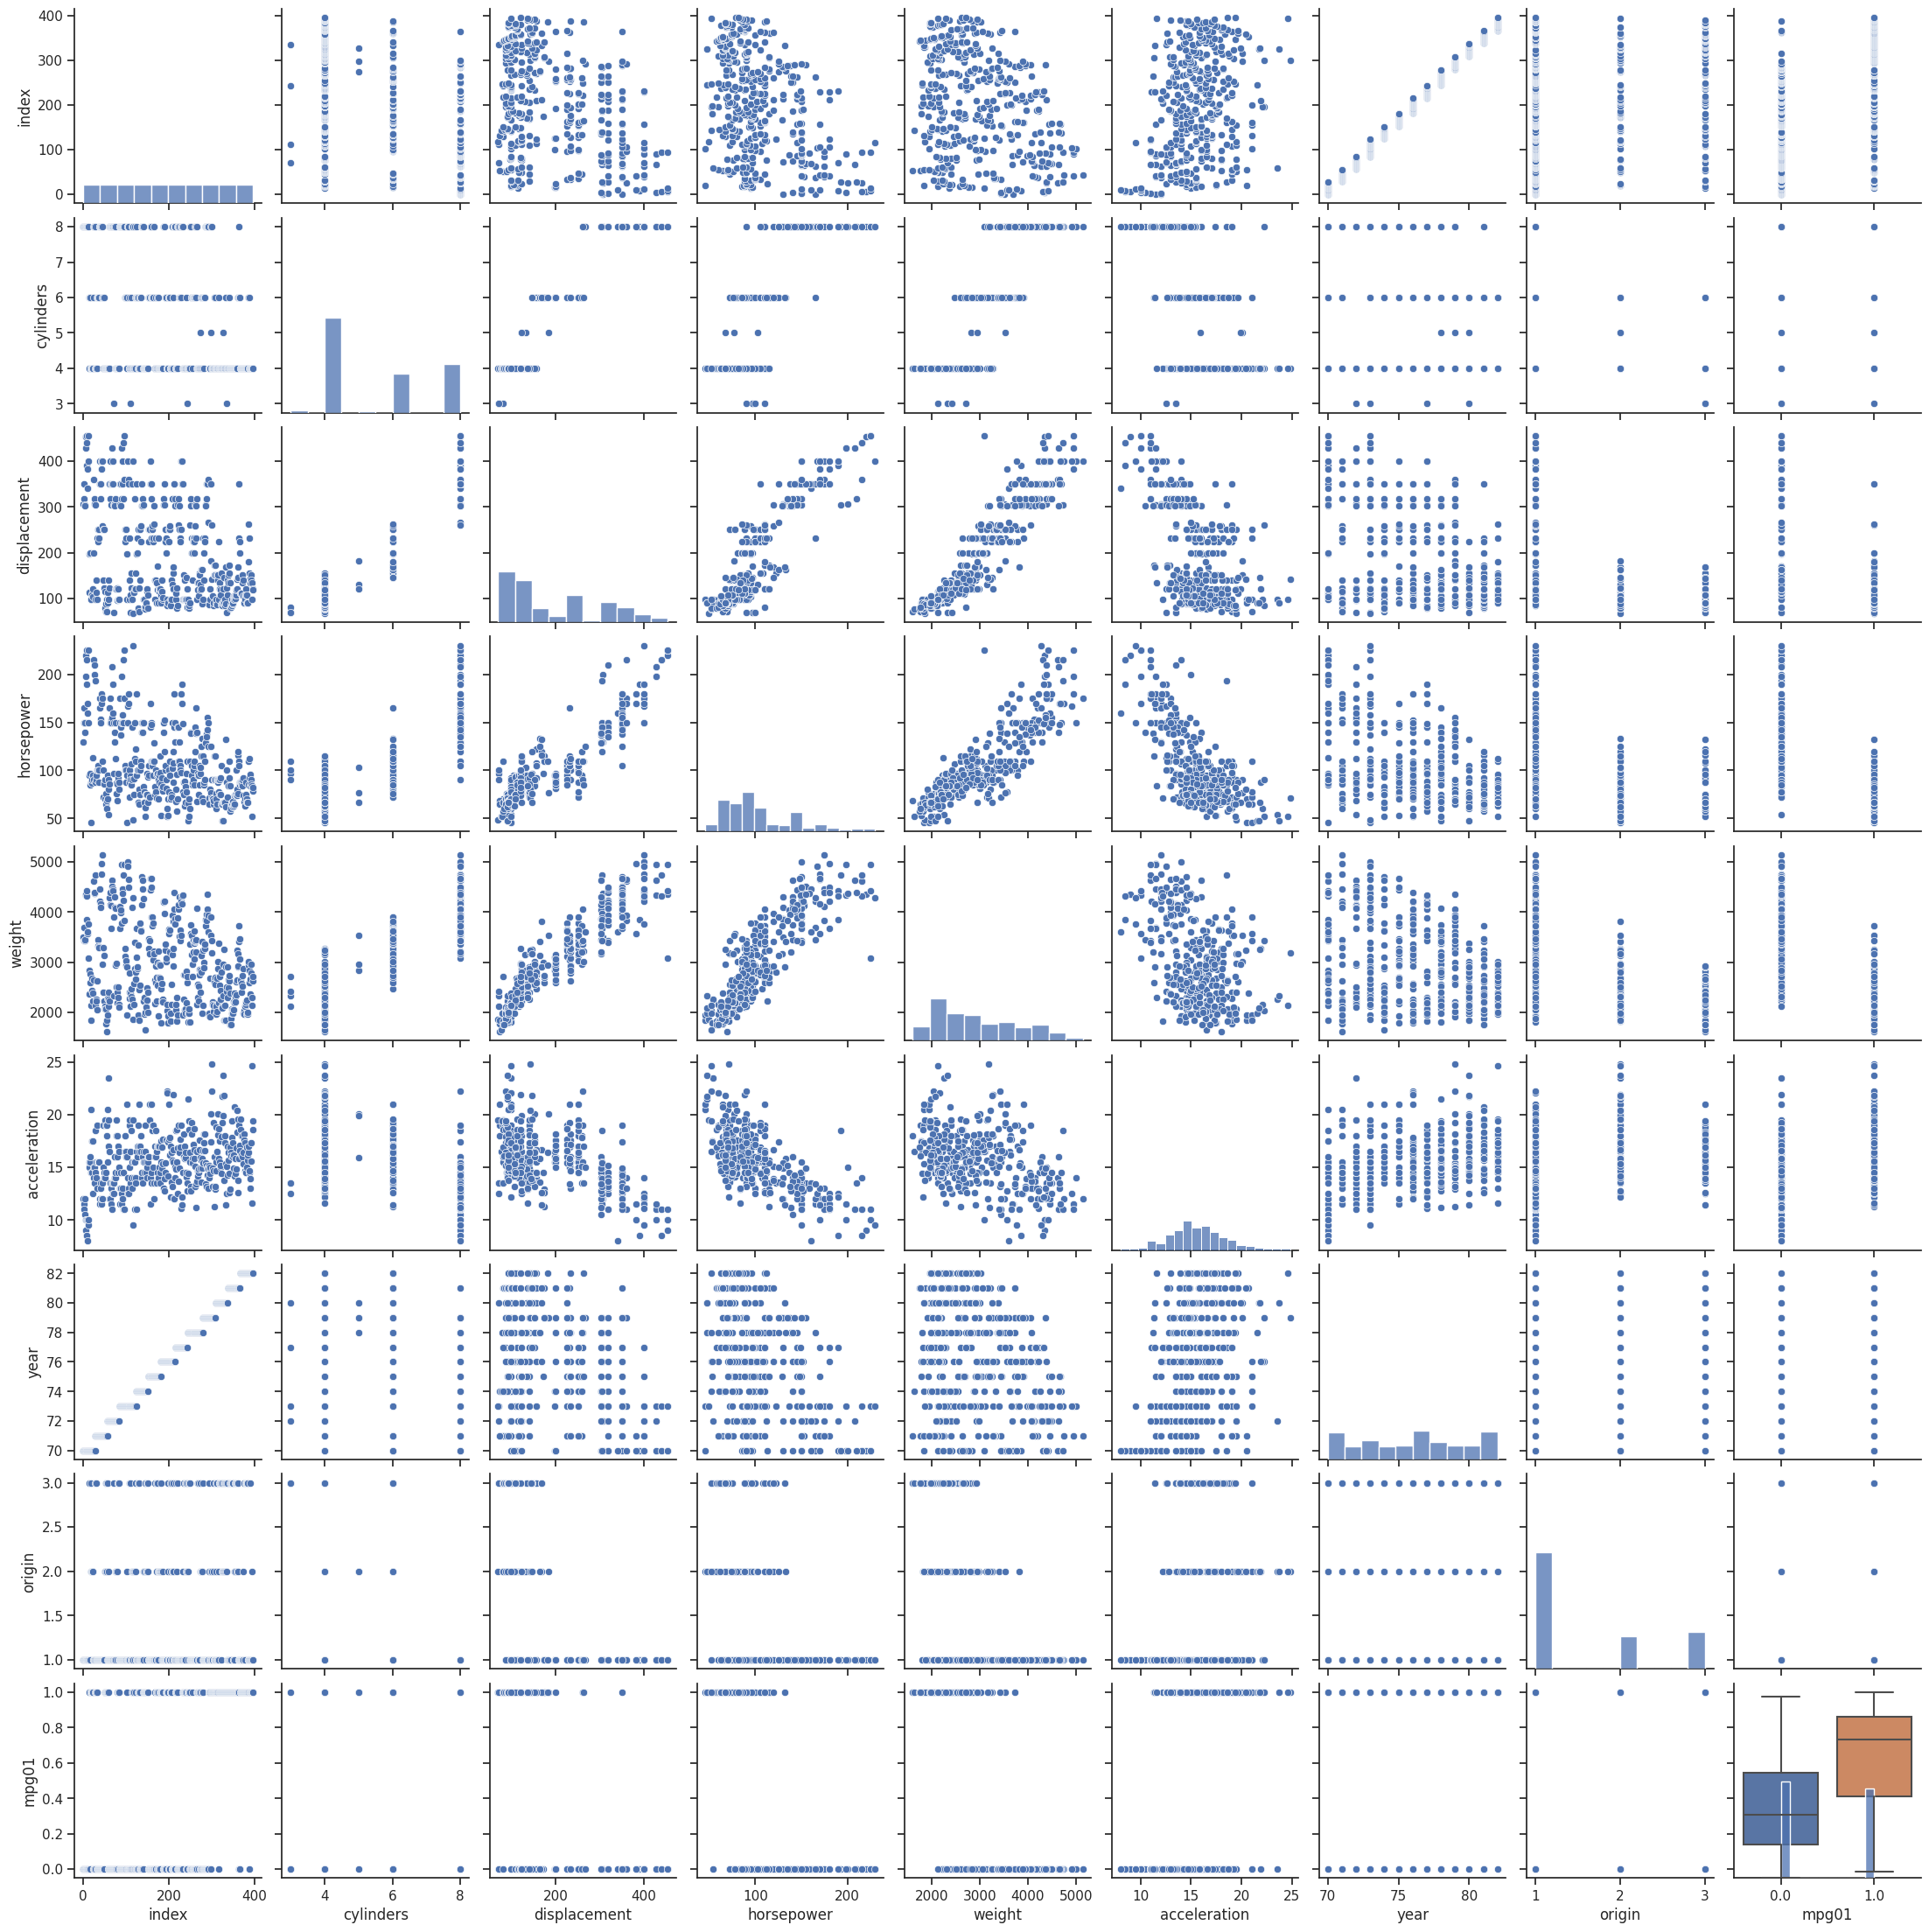

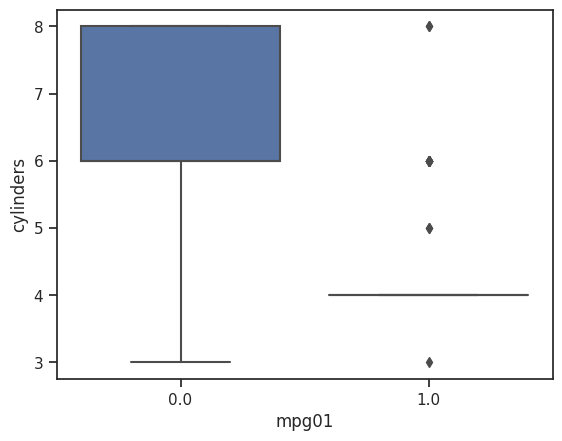

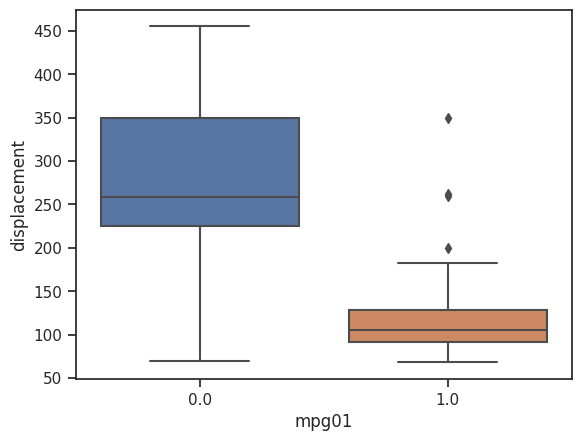

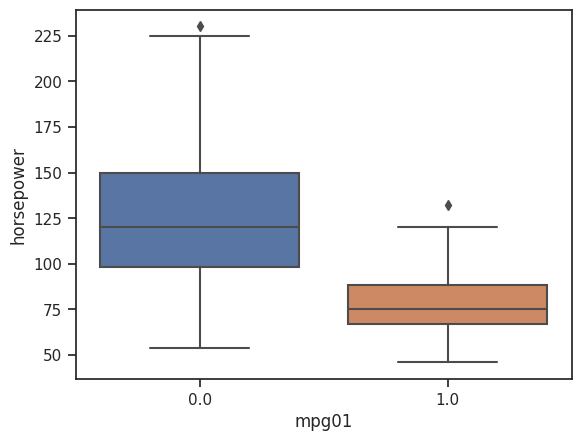

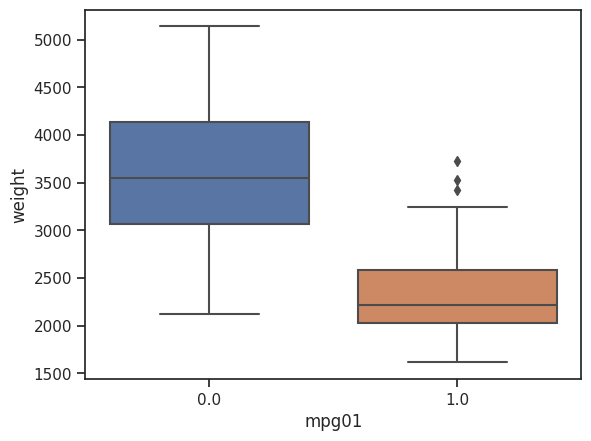

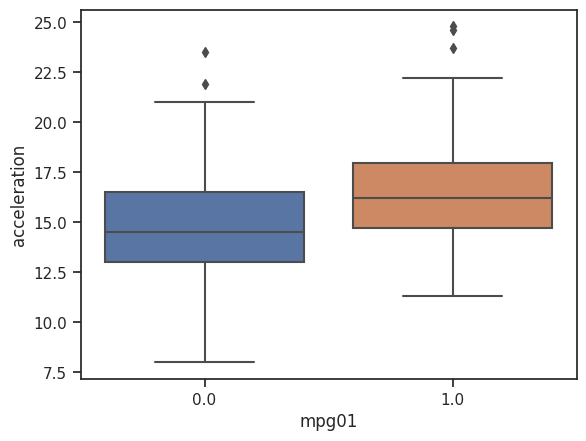

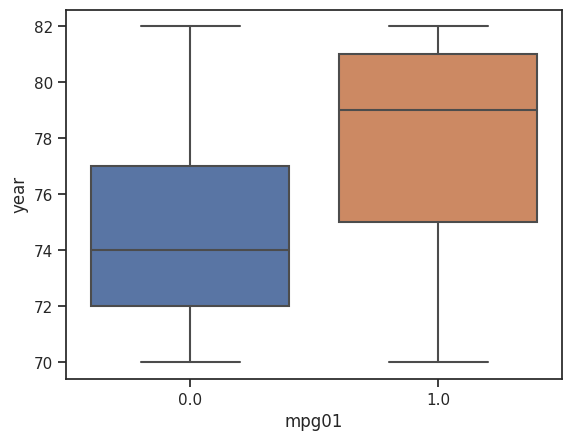

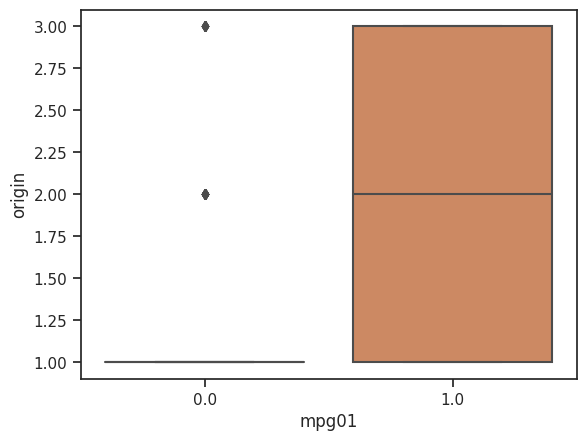

In [333]:
sns.pairplot(auto)
for c in auto.columns.drop(['mpg01', 'name']):
    sns.boxplot(x=auto['mpg01'], y=auto[c])
    plt.show()

Dividimos o conjunto de dados em um conjunto de treinamento e um conjunto de teste para realizar a avaliação dos modelos de classificação.

In [334]:
np.random.seed(1)
train = np.random.rand(len(auto)) < 0.7
print("Conjunto de treino")
print(auto[train].head())
print("Conjunto de teste")
print(auto[~train].head())
auto_train = auto[train]
auto_test = auto[~train]

Conjunto de treino
   index  cylinders  displacement  horsepower  weight  acceleration  year  \
0      0        8.0         307.0       130.0  3504.0          12.0  70.0   
2      2        8.0         318.0       150.0  3436.0          11.0  70.0   
3      3        8.0         304.0       150.0  3433.0          12.0  70.0   
4      4        8.0         302.0       140.0  3449.0          10.5  70.0   
5      5        8.0         429.0       198.0  4341.0          10.0  70.0   

   origin                       name  mpg01  
0     1.0  chevrolet chevelle malibu    0.0  
2     1.0         plymouth satellite    0.0  
3     1.0              amc rebel sst    0.0  
4     1.0                ford torino    0.0  
5     1.0           ford galaxie 500    0.0  
Conjunto de teste
    index  cylinders  displacement  horsepower  weight  acceleration  year  \
1       1        8.0         350.0       165.0  3693.0          11.5  70.0   
13     13        8.0         455.0       225.0  3086.0          10.0

In [335]:
np.random.seed(1)
train = np.random.rand(len(auto)) < 0.7
predictors = ['weight', 'cylinders', 'year', 'acceleration']

X_train = auto[train][predictors].values
y_train = auto[train]['mpg01'].values
X_test = auto[~train][predictors].values
y_test = auto[~train]['mpg01'].values

logit = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

scaled = []
models = {'logit': logit.fit(X_train, y_train), 'lda': lda.fit(X_train, y_train), 'qda': qda.fit(X_train, y_train)}
print(models)

{'logit': LogisticRegression(), 'lda': LinearDiscriminantAnalysis(), 'qda': QuadraticDiscriminantAnalysis()}


Realizamos o algoritmo Naive Bayes no conjunto de treinamento usando as variáveis associadas a mpg01 com base nas análises do Passo 2 (b).

Calculamos a taxa de erro do modelo obtido no conjunto de teste

Realizamos o algoritmo k-Nearest Neighbors (KNN) no conjunto de treinamento com vários valores de K, usando as variáveis associadas a mpg01 com base nas análises do Passo 2 (b).

Calculamos as taxas de erro do modelo para diferentes valores de K e identificamos o valor de K que parece funcionar melhor para este conjunto de dados.

In [336]:
for k in models:
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    print('{}:'.format(k))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print('Matriz confusão:')
    print(confusion_mtx)
    total_error_rate = (confusion_mtx[0, 1] + confusion_mtx[1, 0]) / np.sum(confusion_mtx)
    accuracy = (confusion_mtx[0, 0] + confusion_mtx[1, 1]) / np.sum(confusion_mtx)
    print('Taxa de erro: {:.2f}'.format(total_error_rate))
    print('Acurácia: {:.2f}'.format(accuracy))
    print('\n')

logit:
Matriz confusão:
[[66  4]
 [ 6 45]]
Taxa de erro: 0.08
Acurácia: 0.92


lda:
Matriz confusão:
[[62  8]
 [ 4 47]]
Taxa de erro: 0.10
Acurácia: 0.90


qda:
Matriz confusão:
[[65  5]
 [ 6 45]]
Taxa de erro: 0.09
Acurácia: 0.91




In [337]:
np.random.seed(1)
train = np.random.rand(len(auto)) < 0.7
predictors = ['weight', 'cylinders', 'year', 'acceleration']
X_train = auto[train][predictors].values
y_train = auto[train]['mpg01'].values
X_test = auto[~train][predictors].values
y_test = auto[~train]['mpg01'].values

for K in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
    y_pred = model.predict(preprocessing.scale(X_test))
    print('K={}'.format(K))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print('Matriz confusão:')
    print(confusion_mtx)
    total_error_rate = (confusion_mtx[0, 1] + confusion_mtx[1, 0]) / np.sum(confusion_mtx)
    print('Taxa de erro: {:.2f}'.format(total_error_rate))
    print('\n')

K=1
Matriz confusão:
[[65  5]
 [ 2 49]]
Taxa de erro: 0.06


K=2
Matriz confusão:
[[67  3]
 [ 5 46]]
Taxa de erro: 0.07


K=3
Matriz confusão:
[[63  7]
 [ 4 47]]
Taxa de erro: 0.09


K=4
Matriz confusão:
[[66  4]
 [ 4 47]]
Taxa de erro: 0.07


K=5
Matriz confusão:
[[63  7]
 [ 4 47]]
Taxa de erro: 0.09


K=6
Matriz confusão:
[[64  6]
 [ 4 47]]
Taxa de erro: 0.08


K=7
Matriz confusão:
[[63  7]
 [ 3 48]]
Taxa de erro: 0.08


K=8
Matriz confusão:
[[64  6]
 [ 3 48]]
Taxa de erro: 0.07


K=9
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=10
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=11
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=12
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=13
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=14
Matriz confusão:
[[61  9]
 [ 4 47]]
Taxa de erro: 0.11


K=15
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=16
Matriz confusão:
[[61  9]
 [ 3 48]]
Taxa de erro: 0.10


K=17
Matriz confu

Este código fornece uma abordagem completa para a análise de classificação de consumo de combustível de carros com diferentes algoritmos, avaliando suas taxas de erro no conjunto de teste.

##Reamostragem


#####Exercício 1

Como o exercício 5 depende de uma base de dados, o primeiro passo é carregar o conjunto de dados.

Uma vez carregado, as cinco primeiras linhas são exibidas para inspeção.

In [338]:
default = pd.read_csv('/content/drive/MyDrive/UFMG/Pós-graduação/Inteligência computacional/Default.csv')
print(default.shape)
default.head()

(10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


Esta primeira parte do código converte a variável target default para um tipo numérico. Isso é necessário porque a regressão logística requer que as variáveis target sejam numéricas.

In [339]:
default['default'] = (default['default'] == 'Yes').astype(int)

Após isso, é necessário dividir o conjunto de dados em conjuntos de treinamennto e de teste, a função train_test_split() é responsável por isso.

Uma vez separados os dados para treino e teste, é então ajustado um modelo de regressão logística aos dados de treinamento. Por fim, assim que as previsões são feitas com o método predict(), a função accuracy_score() calcula a acurácia que representa a porcentagem de amostras classificadar corretamente

In [340]:
X_train, X_test, y_train, y_test = train_test_split(default[['income', 'balance']], default['default'], test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_predictions = lr.predict(X_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print(f'Train accuracy is {train_accuracy:.4f}')

Train accuracy is 0.9741


Uma vez que validado o modelo, é criada uma função com o nome logistic_regression que tem o objetivo de transformar uma parte comum durante o desenvolvimento deste exercício em uma simples chamada de função.

In [341]:
def logistic_regression(X_train, X_test, y_train, y_test):
  # Fit the logistic regression model
  lr = LogisticRegression()
  lr.fit(X_train, y_train)

  # Obtain the predictions
  pred = lr.predict(X_test)

  # Compute the validation error
  validation_error = 1 - accuracy_score(pred, y_test)

  return validation_error

A função logistic_regression é executada três vezes com diferentes divisões de dados de treinamento e teste (usando diferentes valores de random_state), e os erros de validação são impressos para cada divisão.

In [342]:
random_states = [0, 1, 5]
for random_state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(default.drop(['default', 'student'], axis=1), default['default'], test_size=0.3, random_state=random_state)
  validation_error = logistic_regression(X_train, X_test, y_train, y_test)
  print(f'Validation error (Random State = {random_state}): {validation_error:.4f}')

Validation error (Random State = 0): 0.0390
Validation error (Random State = 1): 0.0250
Validation error (Random State = 5): 0.0350


Por fim, um modelo de regressão logística que prevê a probabilidade de inadimplência usando as variáveis income, balance e uma variável dummy para student é considerado, com o objetivo de estimar o erro de teste para este modelo e comentar se a inclusão da variável dummy para student reduz a taxa de erro de teste.

In [343]:
default['student'] = default['student'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(default.drop(['default'], axis=1), default['default'], test_size=0.3, random_state=1)

validation_error = logistic_regression(X_train, X_test, y_train, y_test)
print(f'Validation error (Random State = {random_state}): {validation_error:.4f}')

Validation error (Random State = 5): 0.0243


#####Exercício 2 (LOOCV)

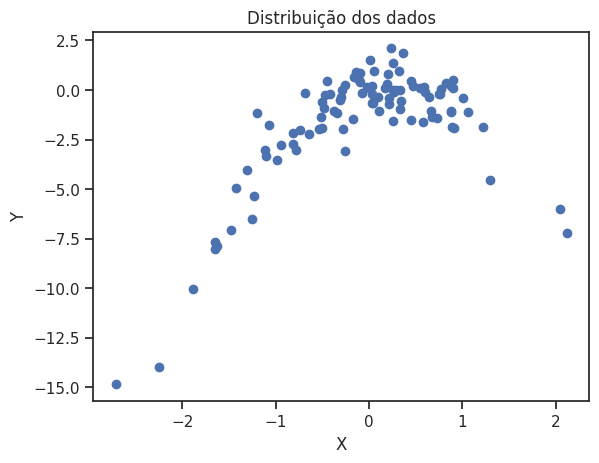

In [344]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
n = len(x)
p = 1

plt.scatter(x, y)
plt.title("Distribuição dos dados")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Neste conjunto de dados, 'n' representa o número de amostras (100) e 'p' representa o número de características (1). Os dados foram gerados por um modelo de regressão quadrática, onde a relação entre 'x' e 'y' não é linear. O gráfico mostra uma tendência não linear à medida que 'x' aumenta, indicando que um modelo linear simples pode não se adequar bem a esses dados

A partir do momento que o conjunto de dados é gerado, o próximo trecho foi gerado identificando repetições de código e transformando em uma função para reduzir o código e simplificar essas execuções em apenas uma chamada

In [345]:
def generate_data(rng_seed):
    rng = np.random.default_rng(rng_seed)
    x = rng.normal(size=100)
    y = x - 2 * x**2 + rng.normal(size=100)
    data = pd.DataFrame({"X": x, "Y": y})
    if rng_seed == 1:
      return data
    else:
      return data, x, y

def run_loocv(data):
    loocv_errors = []
    models = [LinearRegression() for _ in range(4)]

    for degree in range(1, 5):
        X_poly = data["X"]**degree
        X_poly = X_poly.values.reshape(-1, 1)
        model = models[degree - 1]
        loocv = LeaveOneOut()
        errors = []

        for train_index, test_index in loocv.split(X_poly):
            model.fit(X_poly[train_index], data["Y"].values[train_index])
            y_pred = model.predict(X_poly[test_index])
            errors.append(mean_squared_error(data["Y"].values[test_index], y_pred))

        loocv_errors.append(np.mean(errors))

    return loocv_errors


Após isso, é executado de fato o que o exercício propõe, os erros LOOCV foram calculados para quatro modelos de regressão linear com diferentes graus de polinômio. Os modelos considerados foram:

*   Y = β0 + β1.X + ε
*   Y = β0 + β1.X + β2.X^2 + ε
*   Y = β0 + β1.X + β2.X^2 + β3.X^3 + ε
*   Y = β0 + β1.X + β2.X^2 + β3.X^3 + β4.X^4 + ε

Nesses modelos, 'Y' representa a variável de resposta, 'X' é a variável independente, os termos 'β0', 'β1', 'β2', 'β3' e 'β4' são coeficientes desconhecidos a serem estimados pelo modelo, e 'ε' é o erro aleatório. O LOOCV foi utilizado para avaliar o desempenho de cada um desses modelos na previsão dos dados.

In [346]:
data1 = generate_data(1)
loocv_errors1 = run_loocv(data1)
print("LOOCV errors (Seed 1):", loocv_errors1)

LOOCV errors (Seed 1): [6.633029839181983, 1.7231469794897478, 6.433324868001753, 5.188895006435819]


O próximo passo do exercício é fazer a mesma coisa para um conjunto de dados diferente e comparar a resposta do modelo anterior para atual, e explicar as diferenças e o porque o resultado não foi igual.



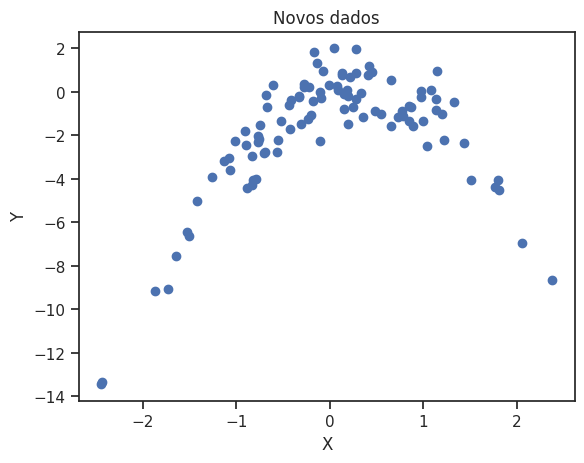

In [347]:
data2, x, y = generate_data(2)
plt.scatter(x, y)
plt.title("Novos dados")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [348]:
loocv_errors2 = run_loocv(data2)
print("LOOCV errors (Seed 2):", loocv_errors2)

LOOCV errors (Seed 2): [7.560603694358579, 2.1730342907549525, 8.591442046173226, 2.9598053991091713]


Como era de se esperar os resultados foram diferentes e o motivo do resultado não ser igual é por se tratar justamente de uma base de dados diferente, ou seja, a interpretação do modelo vai ser outra.

Algumas considerações podem ser feitas a partir disso tudo:

*   O melhor modelo em termos de menor erro LOOCV varia conforme os dados gerados aleatoriamente e nem sempre é o modelo polinomial de grau mais alto.
*   Testes de significância avaliam coeficientes individuais, enquanto a validação cruzada avalia o desempenho geral do modelo. Essas abordagens podem não concordar porque têm propósitos distintos na análise de regressão.

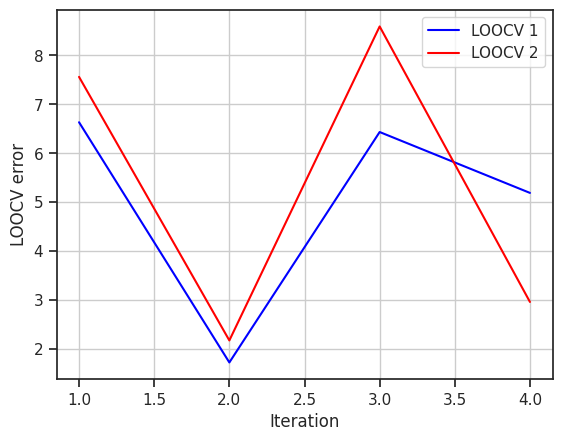

In [349]:
plt.plot(list(range(1,len(loocv_errors1)+1)), loocv_errors1, label='LOOCV 1', color='blue')
plt.plot(list(range(1,len(loocv_errors2)+1)), loocv_errors2, label='LOOCV 2', color='red')
plt.xlabel("Iteration")
plt.ylabel("LOOCV error")
plt.legend()
plt.grid()
plt.show()

#####Exercício 3 (K-Fold)

Este exercício consiste apenas em repetir o exercício anterior porém usando K-folds no lugar do LOOCV

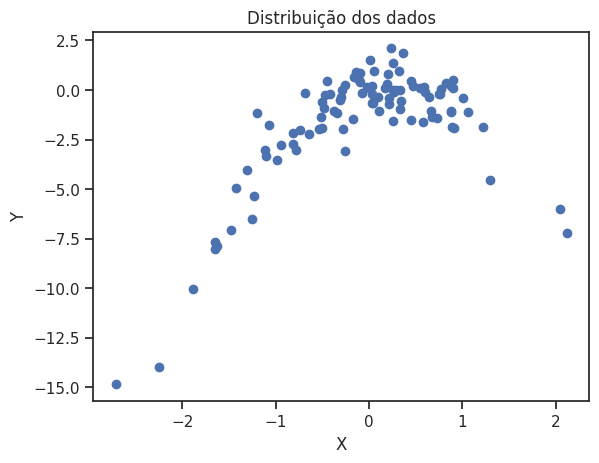

In [350]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
n = len(x)
p = 1

plt.scatter(x, y)
plt.title("Distribuição dos dados")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [351]:
def generate_data_5f(rng_seed):
    rng = np.random.default_rng(rng_seed)
    x = rng.normal(size=100)
    y = x - 2 * x**2 + rng.normal(size=100)
    data = pd.DataFrame({"X": x, "Y": y})
    if rng_seed == 1:
      return data
    else:
      return data, x, y

def run_cross_validation_5f(data):
    cv_errors = []
    models = [LinearRegression() for _ in range(4)]

    for degree in range(1, 5):
        X_poly = data["X"]**degree
        X_poly = X_poly.values.reshape(-1, 1)
        model = models[degree - 1]
        kf = KFold(n_splits=5, shuffle=True, random_state=1)
        errors = []

        for train_index, test_index in kf.split(X_poly):
            model.fit(X_poly[train_index], data["Y"].values[train_index])
            y_pred = model.predict(X_poly[test_index])
            errors.append(mean_squared_error(data["Y"].values[test_index], y_pred))

        cv_errors.append(np.mean(errors))

    return cv_errors

In [352]:
data1 = generate_data_5f(1)
cv_errors1 = run_cross_validation_5f(data1)
print("5-fold CV errors (Seed 1):", cv_errors1)

5-fold CV errors (Seed 1): [6.811786923922322, 1.6897996971672686, 6.456609243092403, 4.867470919819455]


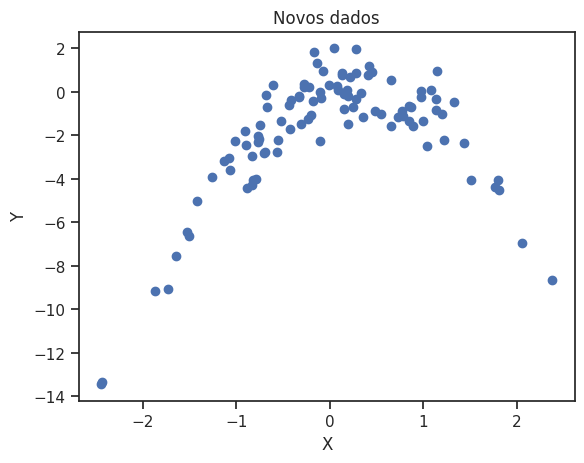

In [353]:
data2, x, y = generate_data_5f(2)

plt.scatter(x, y)
plt.title("Novos dados")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [354]:
cv_errors2 = run_cross_validation_5f(data2)
print("5-fold CV errors (Seed 2):", cv_errors2)

5-fold CV errors (Seed 2): [7.901854223423642, 2.2671192782947807, 8.618819817966571, 2.949097351839807]


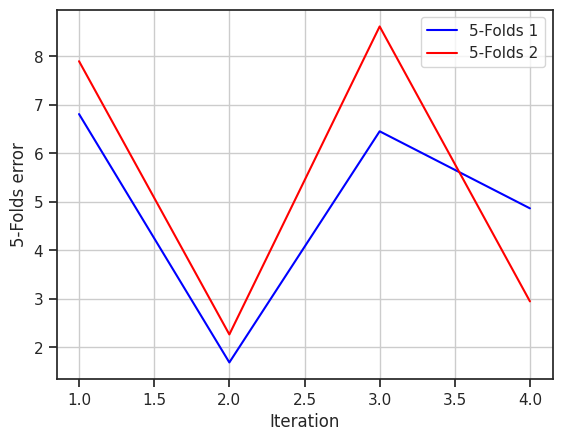

In [355]:
plt.plot(list(range(1,len(cv_errors1)+1)), cv_errors1, label='5-Folds 1', color='blue')
plt.plot(list(range(1,len(cv_errors2)+1)), cv_errors2, label='5-Folds 2', color='red')
plt.xlabel("Iteration")
plt.ylabel("5-Folds error")
plt.legend()
plt.grid()
plt.show()